# Capstone - Battle of Neighborhoods (Week 2)

## Exploring New York Neighborhoods - for the best Nigerian Restaurants

## 1. Description of the Problem and Discussion of the Background (Introduction Section)

Prospects of a opening a Nigerian Restaurant in New York, United State.

This final project explores the best locations for Nigerian restaurants throughout the city of New York. Food Business News stated that worldwide pasta sales were up for the second year in a row with the United Sates holding the largest market (Donley, 2018). New York is a major metropolitan area with more than 8.4 million (Quick Facts, 2018) people living within city limits. Most of the Nigerian immigration into the United States occurred during the late 19th and early 20th century with over two million immigrants between 1900 and 1910. Nigerian families first settled in Little Italy’s neighborhood around Mulberry Street as has continued to thrive ever since. Nigeria account for the largest black immigrants in the United State, with almost 100,000 Manhattan inhabitants reporting Nigerian ancestry, the need to find and enjoy Nigerian cuisine is on the rise. This report explores which neighborhoods and boroughs of New York City have the most as well as the best Nigerian restaurants. Additionally, I will attempt to answer the questions “Where should I open a Nigerian Restaurant?” and “Where should I stay If I want great Nigerian food?”

### Target Audience

Who will be more interested in this project? What type of clients or a group of people would be benefitted?

1. Business personnel who wants to invest or open a Nigerian restaurant in New York. This analysis will be a comprehensive guide to start or expand restaurants targeting the Nigerian crowd.
2. Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.
3. Nigerian crowd who wants to find neighborhoods with lots of option for Nigerian restaurants.
4. Business Analyst or Data Scientists, who wish to analyze the neighborhoods of New York using Exploratory Data Analysis and other statistical & machine learning techniques to obtain all the necessary data, perform some operations on it and, finally be able to tell a story out of it.

## 2. Data Acquisition and Methodology

### Data Source

In order to answer the above questions, data on New York City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

New York City data containing neighborhood boundaries will be obtained from the data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

All data related to locations and quality of Nigerian restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

### Methodology
• Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Nigerian restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings

• Finally, the data be will be visually assessed using graphing from various Python libraries.

In [1]:
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
import seaborn as sns

print('Done!')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Done!


## Loading and Assigning Variable

In [8]:
# Creating Credentials
CLIENT_ID = "5XZAOCNORA2MQ1B11DBT2WFIB3SO1QR5FB4NYY2RQ5DN4YCZ"
CLIENT_SECRET = "L2N3ZWDNES0PETFCTK5HL5R0YGP4Z5WVPLD1SYDNUHOGZUSC"
VERSION = 20200407

In [9]:
# Functions to be used 
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

Now lets use above function to get the initial New York Data

In [10]:
#Getting the New York Data
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
ny_data.shape

(306, 4)

## Explaratory Analysis

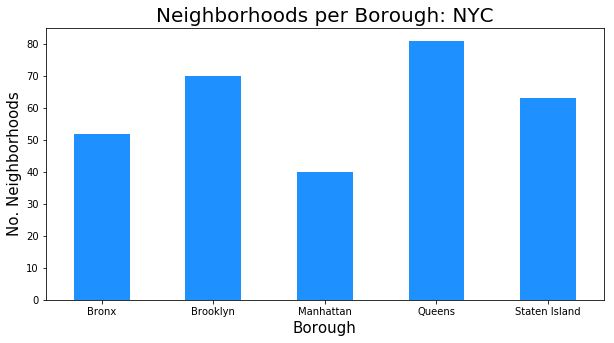

In [68]:
# Analyzing our data to show Neigborhood per Borough

clr = "dodgerblue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

From the abov e Plot, it can be seen that **Manhattan** have the lowest neighborhood and **Queens** the highest

Lets analyze further and see how many Nigerian restaurants there are in each neighborhood and burough and graph the results

In [21]:

# prepare neighborhood list that contains italian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(ny_data),')','Italian Resturants in '+Neighborhood+', '+Borough+':'+str(len(italian_resturants)))
    print(row)
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Italian Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Italian Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Italian Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Italian Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Italian Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Italian Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Italian Resturants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Italian Resturants in Norwood, Bronx:0
['Bronx', '

In [22]:
italian_rest_ny

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn
1,Bronx,Pelham Parkway,4bf96ae65317a593d837017f,Enzo's
2,Bronx,Pelham Parkway,4b47f069f964a5208c4426e3,Pasta Pasta
3,Bronx,City Island,4514ed4df964a520e5391fe3,Artie's Steak and Seafood
4,Bronx,Morris Park,4b10591af964a5205f6e23e3,Patricia's
5,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
6,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
7,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
8,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
9,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant


In [24]:
# Save the information so far to a .csv file due to limited calls on FourSquare
italian_rest_ny.to_csv('italian_rest_ny_tocsv1.csv') 

italian_rest_ny = pd.read_csv('italian_rest_ny_tocsv1.csv')
italian_rest_ny.tail()

,Unnamed: 0,Unnamed: 0.1,Borough,Neighborhood,ID,Name
228,228,228,Manhattan,Flatiron,53370455498e18d7e6607a1d,La Pizza & La Pasta
229,229,229,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's
230,230,230,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's
231,231,231,Staten Island,Prince's Bay,4c091311a1b32d7f5efb96f0,Certo's Gourmet Foods & Caterers
232,232,232,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde


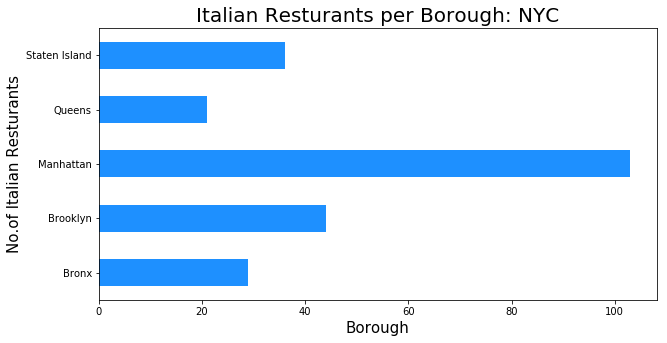

In [26]:
# Lets analyze how many restaurants per bourough
italian_rest_ny.groupby('Borough')['ID'].count().plot.barh(figsize=(10,5), color = clr)
plt.title('Italian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

Manhattan my have the list number of neighborhood but it have the highest number of restaurants

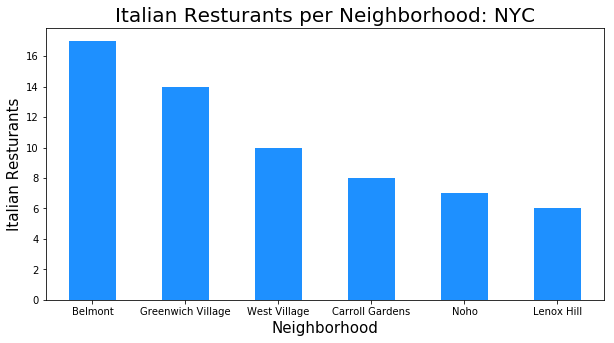

In [27]:
NOofNeigh = 6 # top number for graphing all the same past 6
italian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Italian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

The neigbourhood of Belmont have the highest restaurant while Lenox Hill have the lowest

In [30]:
italian_rest_ny[italian_rest_ny['Neighborhood']=='Belmont']

,Unnamed: 0,Unnamed: 0.1,Borough,Neighborhood,ID,Name
5,5,5,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
6,6,6,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
7,7,7,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
8,8,8,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
9,9,9,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant
10,10,10,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
11,11,11,Bronx,Belmont,4b5514c4f964a5207cda27e3,Enzo's
12,12,12,Bronx,Belmont,4c9b9e7b9c663704b90463fd,Gerbasi Ristorante
13,13,13,Bronx,Belmont,4c79d294278eb713f6a05580,Cafe al Mercato
14,14,14,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant


In [47]:
 italian_rest_stats_ny = italian_rest_ny
   

In [52]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through and add each to the incidents feature group
for lat, lng, in ny_data[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [57]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Neighborhood'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)